In [2]:
#Imports 
import requests
import json
import pandas as pd
import geopandas as gpd

In [3]:
# Prepare query URL to fetch JSON data from Maryland Government site
query_url = 'https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.json?accessType=DOWNLOAD'

# Fetch data using requests
response = requests.get(query_url)

In [4]:
# Validate response status
if response.status_code == 200 :
    json_data = response.json()
else :
    print(f'URL returned response code {response.status_code}')

In [5]:
# Prepare a dictionary to create a DataFrame. Current response JSON contains 
# column names in meta attribute. Create list of dictionary with columns as keys
dictionary_list = json_data['meta']['view']['columns']
print(dictionary_list)

[{'id': -1, 'name': 'sid', 'dataTypeName': 'meta_data', 'fieldName': ':sid', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}, {'id': -1, 'name': 'id', 'dataTypeName': 'meta_data', 'fieldName': ':id', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}, {'id': -1, 'name': 'position', 'dataTypeName': 'meta_data', 'fieldName': ':position', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}, {'id': -1, 'name': 'created_at', 'dataTypeName': 'meta_data', 'fieldName': ':created_at', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}, {'id': -1, 'name': 'created_meta', 'dataTypeName': 'meta_data', 'fieldName': ':created_meta', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}, {'id': -1, 'name': 'updated_at', 'dataTypeName': 'meta_data', 'fieldName': ':updated_at', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']

In [6]:
# Extract column names through list comprehension
column_names = [dictionary['name'] for dictionary in dictionary_list][8:-9]
print(column_names)

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude']


In [7]:
# Extract rows from JSON and put it in a list
rows = []
for list_data in json_data['data']:
    data = list_data[8:-9]
    rows.append({column:value for column, value in zip(column_names,data)})
# Print first two records
print(json.dumps(rows[0:2], indent=4))

[
    {
        "Report Number": "DM8479000T",
        "Local Case Number": "210020119",
        "Agency Name": "Takoma Park Police Depart",
        "ACRS Report Type": "Property Damage Crash",
        "Crash Date/Time": "2021-05-27T19:40:00",
        "Route Type": null,
        "Road Name": null,
        "Cross-Street Name": null,
        "Off-Road Description": "IN PARKING LOT",
        "Municipality": null,
        "Related Non-Motorist": null,
        "Collision Type": "OTHER",
        "Weather": "CLEAR",
        "Surface Condition": null,
        "Light": "DAYLIGHT",
        "Traffic Control": "NO CONTROLS",
        "Driver Substance Abuse": "NONE DETECTED",
        "Non-Motorist Substance Abuse": null,
        "Person ID": "CF61C6EB-61C4-4627-9767-635D2F0174A6",
        "Driver At Fault": "No",
        "Injury Severity": "NO APPARENT INJURY",
        "Circumstance": "N/A",
        "Driver Distracted By": "UNKNOWN",
        "Drivers License State": "MD",
        "Vehicle ID": "D3F

In [8]:
# Create a DataFrame of crashes
df_crashes = pd.DataFrame(rows)
display(df_crashes.head())
display(df_crashes.tail())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27T19:40:00,None,None,None,IN PARKING LOT,None,...,PARKED,None,0,No,Yes,2017,HINO,TWK,38.98765667,-76.987545
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,2015-09-11T13:29:00,None,None,None,Parking Lot: \n2525 Ennalls Ave,None,...,PARKING,South,5,No,No,2012,TOYOTA,SU,39.03991652,-77.05364898
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,2018-08-17T14:25:00,None,None,None,PARKING LOT OF 16246 FREDERICK RD,None,...,BACKING,West,15,No,No,2015,MAZD,TK,38.743373,-77.54699707
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,2023-08-11T18:00:00,None,None,None,1 N SUMMIT DRIVE,None,...,MOVING CONSTANT SPEED,Unknown,15,No,No,2018,RAM,TK,39.14587303,-77.19194047
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,2023-12-06T18:42:00,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,None,KENSINGTON,...,MOVING CONSTANT SPEED,South,35,No,No,2017,AUDI,A3,39.02517017,-77.07633333


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
185293,MCP3040006M,240042875,MONTGOMERY,Property Damage Crash,2024-09-09T20:00:00,Maryland (State) Route,GEORGIA AVE,EMORY LA,None,None,...,Moving Constant Speed,None,45,No,No,2008,HONDA,CR-V,39.12611172,-77.0721996
185294,MCP30760045,240044327,MONTGOMERY,Injury Crash,2024-09-17T16:41:00,Interstate (State),IS 270 LOCAL LANES (NB),None,None,None,...,Stopped in Traffic,Northbound,55,No,No,2019,TOYOTA,COROLLA,39.11485928,-77.19158805
185295,MCP241100DT,240045307,MONTGOMERY,Injury Crash,2024-09-23T07:25:00,County Route,ROCKING HORSE RD,GAYNOR RD RANDOLPH RD RANDOLPH RD (WB/L),None,None,...,Turning Left,Westbound,35,No,No,2010,HONDA,ODYSSEY,39.053902,-77.09432717
185296,MCP2844007X,240044414,MONTGOMERY,Property Damage Crash,2024-09-18T07:55:00,County Route,RANDOLPH RD,None,None,None,...,Slowing or Stopping,Eastbound,40,No,No,2008,NISSAN,ALTIMA,39.06308239,-77.04087984
185297,MCP3068005R,240044334,MONTGOMERY,Property Damage Crash,2024-09-17T17:37:00,Maryland (State) Route,WISCONSIN AVE,LELAND ST,None,None,...,Moving Constant Speed,Northbound,35,No,No,2021,THOMAS BUILT,SCHOOL BUS,38.9800724,-77.09206294


In [9]:
# Display columns
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185298 entries, 0 to 185297
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Report Number                  185298 non-null  object
 1   Local Case Number              185298 non-null  object
 2   Agency Name                    185298 non-null  object
 3   ACRS Report Type               185298 non-null  object
 4   Crash Date/Time                185298 non-null  object
 5   Route Type                     167136 non-null  object
 6   Road Name                      166522 non-null  object
 7   Cross-Street Name              161184 non-null  object
 8   Off-Road Description           17125 non-null   object
 9   Municipality                   156182 non-null  object
 10  Related Non-Motorist           5920 non-null    object
 11  Collision Type                 185298 non-null  object
 12  Weather                        185298 non-nu

In [10]:
# Create a focused DataFrame with limited columns
required_columns = ['Report Number','Crash Date/Time','Weather',
                    'Surface Condition','Injury Severity','Vehicle ID',
                    'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude']

# Create focused DataFrame
df_focused_crashes = df_crashes[required_columns].copy()

display(df_focused_crashes.head())
display(df_focused_crashes.tail())

,Report Number,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,DM8479000T,2021-05-27T19:40:00,CLEAR,None,NO APPARENT INJURY,D3F480EE-638B-459A-BC20-533741BC4F76,2017,HINO,TWK,38.98765667,-76.987545
1,MCP2970000R,2015-09-11T13:29:00,CLEAR,None,NO APPARENT INJURY,14ECEFCD-3A58-4991-A9C6-A9D5CA54B419,2012,TOYOTA,SU,39.03991652,-77.05364898
2,MCP20160036,2018-08-17T14:25:00,CLEAR,None,NO APPARENT INJURY,995C9706-91EC-48FC-8D2A-31759590E3EA,2015,MAZD,TK,38.743373,-77.54699707
3,EJ7879003C,2023-08-11T18:00:00,CLEAR,None,NO APPARENT INJURY,EDF71D99-8A86-4CCD-BD22-3F32076A134A,2018,RAM,TK,39.14587303,-77.19194047
4,MCP2967004Y,2023-12-06T18:42:00,CLEAR,DRY,NO APPARENT INJURY,9870F867-5BC8-4ABB-BA69-A2E515C416CD,2017,AUDI,A3,39.02517017,-77.07633333


,Report Number,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
185293,MCP3040006M,2024-09-09T20:00:00,Clear,Dry,No Apparent Injury,49F1807E-1E78-4ADE-9B5A-BC9D85BDB1E9,2008,HONDA,CR-V,39.12611172,-77.0721996
185294,MCP30760045,2024-09-17T16:41:00,Rain,Wet,No Apparent Injury,8AD4CC04-6218-4B57-9BF6-D6938072CE8F,2019,TOYOTA,COROLLA,39.11485928,-77.19158805
185295,MCP241100DT,2024-09-23T07:25:00,Clear,Dry,No Apparent Injury,8CBE428B-F843-47C1-8F2B-DEB024119C02,2010,HONDA,ODYSSEY,39.053902,-77.09432717
185296,MCP2844007X,2024-09-18T07:55:00,Rain,Wet,No Apparent Injury,E23FF4A0-9B36-48E1-B788-3904AF2BB614,2008,NISSAN,ALTIMA,39.06308239,-77.04087984
185297,MCP3068005R,2024-09-17T17:37:00,Rain,Wet,No Apparent Injury,31EC4E7C-F37F-417C-A478-524B3260CF03,2021,THOMAS BUILT,SCHOOL BUS,38.9800724,-77.09206294


In [11]:
df_focused_crashes['Crash Date/Time'] = pd.to_datetime(df_focused_crashes['Crash Date/Time'])

In [12]:
df_focused_crashes.drop_duplicates(subset='Report Number', inplace=True)
df_focused_crashes.sort_values(by='Crash Date/Time', inplace=True)
df_focused_crashes.head()


,Report Number,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
66126,MCP11520005,2015-01-01 00:30:00,CLEAR,DRY,NO APPARENT INJURY,EED35F71-B94E-4225-98D4-3405AEA57D0B,1993,BUICK,4S,39.02200107,-77.10267305
44614,MCP2686000D,2015-01-01 01:10:00,N/A,DRY,NO APPARENT INJURY,3F9C76B4-F704-4FA7-87AB-B3BAEBBC5146,2007,JEEP,COMPASS,39.19661,-77.26554667
14306,MCP2783000G,2015-01-01 01:14:00,CLEAR,DRY,NO APPARENT INJURY,89F9B6F8-1F89-4EBD-84A3-D0DAE2D7A90C,1999,FORD,PICK UP,39.09621667,-77.10980333
79817,MCP2674000D,2015-01-01 01:26:00,CLEAR,DRY,NO APPARENT INJURY,D6C5600D-D372-44B3-96AF-B1F24A05F5AF,1998,ISU,RODEO,39.158059,-77.204349
141094,MCP23000002,2015-01-01 02:00:00,CLEAR,DRY,NO APPARENT INJURY,D08E5FC7-8FA0-454B-A3EF-27002B08324B,2009,FORD,CROWN VIC,39.148678,-77.093848


In [13]:
df_focused_crashes['Injury Severity'] = df_focused_crashes['Injury Severity'].str.upper()
rename_values = {'POSSIBLE INJURY' : 'SUSPECTED MINOR INJURY'}
df_focused_crashes['Injury Severity'] = df_focused_crashes['Injury Severity'].replace(rename_values)
df_focused_crashes['Injury Severity'] = df_focused_crashes['Injury Severity']
df_focused_crashes['Injury Severity'] = df_focused_crashes['Injury Severity'].fillna('NO APPARENT INJURY')
df_focused_crashes['Injury Severity'].value_counts(dropna=False)


Injury Severity
NO APPARENT INJURY          86459
SUSPECTED MINOR INJURY      16817
SUSPECTED SERIOUS INJURY      941
FATAL INJURY                  128
Name: count, dtype: int64

In [14]:
# 
montgomery_gdf = gpd.GeoDataFrame(df_focused_crashes, geometry=gpd.points_from_xy(df_focused_crashes.Longitude, df_focused_crashes.Latitude))
montgomery_gdf.crs = 'EPSG:4326'

<Axes: >

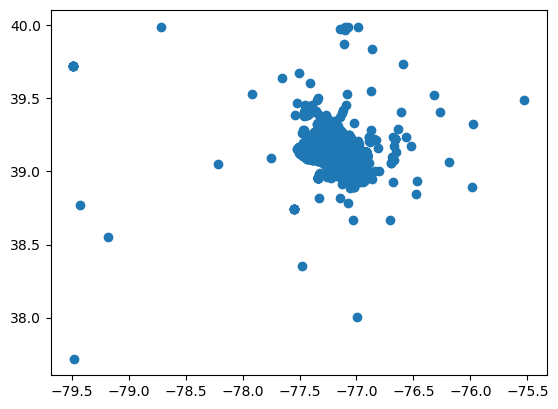

In [15]:
montgomery_gdf.plot()

In [16]:
county_gdf = gpd.read_file('../Resources/Montgomery_County.json')

<Axes: >

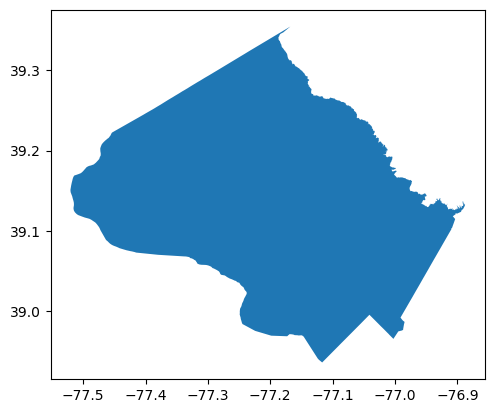

In [18]:
county_gdf.plot()

In [19]:
data_crash_clip = gpd.clip(montgomery_gdf, county_gdf)

<Axes: >

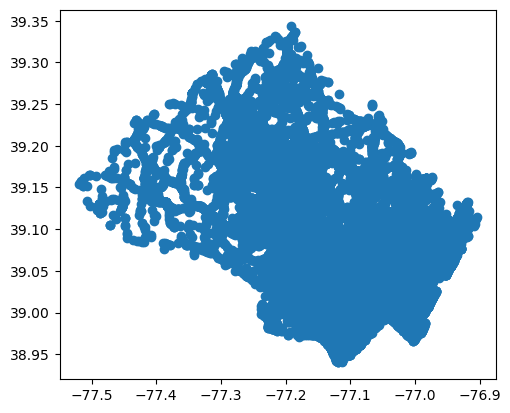

In [20]:
data_crash_clip.plot()

In [22]:
data_crash_clip = data_crash_clip.reset_index()

In [23]:
data_crash_clip

,index,Report Number,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,geometry
0,58837,MCP26370040,2021-04-04 12:00:00,CLEAR,DRY,NO APPARENT INJURY,88FCD6CE-A85A-4CBD-9BEC-3B6E6DCF16BB,2021,MITS,DELOCA,39.05720146,-77.29310223,POINT (-77.2931 39.0572)
1,9609,MCP3221002N,2023-12-04 21:37:00,CLEAR,DRY,SUSPECTED MINOR INJURY,6E02796A-26BA-45CD-88B1-13EEDF7EC29C,2015,TOYOTA,RAV4,39.05868333,-77.29070333,POINT (-77.2907 39.05868)
2,179250,MCP9399002C,2024-07-17 21:27:00,Cloudy,Wet,SUSPECTED MINOR INJURY,70D8BF87-2BB7-4092-9267-0AD9E7E42978,2004,JEEP,GRAND CHEROKEE,39.06310977,-77.29579535,POINT (-77.2958 39.06311)
3,10896,MCP28240026,2016-06-21 09:49:00,RAINING,WET,NO APPARENT INJURY,334BEA8D-C367-4DFB-8A70-93750F1BCFBC,2008,HOND,4S,39.06319167,-77.296605,POINT (-77.2966 39.06319)
4,147077,MCP2497000L,2016-12-05 06:55:00,RAINING,WET,SUSPECTED MINOR INJURY,B8B60239-5172-4024-846A-0EAFD3A7E0B2,2004,VOLVO,S60,39.06322,-77.29574,POINT (-77.29574 39.06322)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103997,107649,MCP102200DF,2019-12-09 07:33:00,FOGGY,WET,SUSPECTED MINOR INJURY,AF684BC1-5F7C-4D64-8B52-2AC21CA8B8B2,2013,ACUR,4S,39.22713833,-77.076205,POINT (-77.0762 39.22714)
103998,3200,MCP11130054,2023-09-19 08:43:00,CLEAR,DRY,NO APPARENT INJURY,00E50701-EE0E-4111-8387-9A2EC0B1A918,2012,NISS,ALTIMA,39.22716667,-77.075935,POINT (-77.07594 39.22717)
103999,34346,MCP29910018,2016-10-29 14:05:00,CLEAR,DRY,NO APPARENT INJURY,D1426D72-8E8A-4696-B263-AC8C1EAF9980,1991,TOYT,COROLLA,39.227065,-77.07580833,POINT (-77.07581 39.22706)
104000,88990,MCP2946003Y,2021-09-24 07:43:00,CLEAR,DRY,NO APPARENT INJURY,AA014BD5-2716-4A7B-9C76-68D20D642F0E,2014,CHEV,SONIC,39.22707833,-77.07514333,POINT (-77.07514 39.22708)
